In [69]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install nltk
%pip install Sastrawi
%pip install wordcloud
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Data PreProcessing

In [70]:
import pandas as pd

df = pd.read_csv('sample_data/the_data_selected.csv', sep=';', encoding='ISO-8859-1')
# df = pd.read_csv('sample_data/the_data_selected.csv', sep=',')
my_df = df[['score', 'content']]
my_df.head()

,score,content
0,5,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu."
1,5,"Baru pertama kemuseum ini, dan dari beberapa museum batik yg pernah aku kunjungi, koleksi di museum ini nggak terlalu banyak. Tapi ternyata karna sistem di museum ini koleksinya dirolling, jadi kalau mau lihat koleksi yg berbeda tanya dulu ke pihak museum jadwal ganti koleksinya kapan ?? lokasinya gampang banget dicari, ada di titik 0 km Pekalongan. Gedungnya juga sangat standout, gedung kuno yang gede banget. Tour guide dan staff lain baik, ramah, murah senyum. Selain bisa lihat koleksi batik di museum ini juga ada perpustakaan yang koleksi buku tentang batiknya sangat lengkap, terus kita bisa langsung nyobain praktek bikin batik. Semua alat dan bahan sudah tersedia. Ada banyak pilihan cap batik yang bisa dipilih, kalau mau pakai canting juga boleh, pokoknya bebas mencoba. Overall kunjungan ke museum batik ini cukup berkesan ??????"
2,5,Koleksi batik lengkap dan bisa hands-on nyoba membatik juga! Mudah dipahami dan WAJIB NYOBA MEMBATIK SOALNYA SESERU ITU ???????
3,5,"Akhirnya kesampean buat mampir ke museum ini. HTM 7 ribu rupiah buat pengunjung dewasa.\nAda 3 ruang pamer, ruang audio visual (tadi belum bisa masuk ke ruang audio visual karena lagi ada problem), perpustakaan, musala, toilet, kantin, dan tempat untuk beli suvenir. Kalo mampir kesini bisa ikutan workshop batik.\nTempatnya bersih, info tentang koleksi museum sangat jelas, staff ramah, tempat parkir luas.\nBeberapa catatan buat museum:\n AC di Ruang Pamer 2 dan 3 tidak dingin.\n Sebaiknya penjelasan tentang koleksi di lengkapi dengan bahasa inggris, karena tidak semua koleksi ada bahasa tersebut.\n Ada beberapa info tentang koleksi yang tidak ada BARCODE.\n Sebaiknya ditingkatkan lagi promosi melalui media sosial agar banyak pihak yang tertarik untuk mampir."
4,5,"Suka sekali, tiket nya Murmer cm 7000 per org. Bs melihat berbagai macam batik. Trs bisa coba gambar batiknya pake canting. Petugas nya sangat ramah2, aplg yg di area membatik. Cocok untk wisata keluarga dan anak2. Bisa mewarnai jg"


### Menghitung Jumlah Baris

In [71]:
len(my_df.index)

906

### Menghapus Baris yang Null

In [72]:
my_df = my_df.dropna(subset=['content'])
my_df.isnull().sum()

score      0
content    0
dtype: int64

### Menghitung Jumlah Baris setelah Null Dihilangkan

In [73]:
len(my_df)

625

## a. Casefolding

Proses casefolding adalah proses mengubah seluruh huruf menjadi kecil.

In [74]:
import re
def clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    my_df[new_text_field_name] = my_df[new_text_field_name].str.replace(r"\d+", "")
    return my_df

In [75]:
my_df['text_clean'] = my_df['content'].str.lower()

In [76]:
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head()

,score,content,text_clean
0,5,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu.",terletak di depan lapangan jetayu menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya pekalongan tapi juga koleksi batik beberapa daerah cukup nyaman tempatnya ber ac yg cukup dingin menyajikan proses pembuatan batik dari awal sampai akhir disediakan juga layar lcd yg menampilkan informasi tentang batik kalau membutuhkan bisa ditemani oleh pemandu buka setiap hari dari jam 8 pagi smpai jam 3 soredi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide ada kantin di sini dan bangku2 panjang untuk istirahat beberapa foto2 industri batik tempo dulu dipajang di tembok musiumsaran saya koleksi batik mohon bisa diperbanyak karena tiap daerah di indonesia punya ciri khas batik masing2 juga yg gak kalah penting dibuat sejarah singkat modeltype zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2parkir motor langsung di depan musium parkir mobil atau bis pariwisata bisa di sekitar lapangan jetayu
1,5,"Baru pertama kemuseum ini, dan dari beberapa museum batik yg pernah aku kunjungi, koleksi di museum ini nggak terlalu banyak. Tapi ternyata karna sistem di museum ini koleksinya dirolling, jadi kalau mau lihat koleksi yg berbeda tanya dulu ke pihak museum jadwal ganti koleksinya kapan ?? lokasinya gampang banget dicari, ada di titik 0 km Pekalongan. Gedungnya juga sangat standout, gedung kuno yang gede banget. Tour guide dan staff lain baik, ramah, murah senyum. Selain bisa lihat koleksi batik di museum ini juga ada perpustakaan yang koleksi buku tentang batiknya sangat lengkap, terus kita bisa langsung nyobain praktek bikin batik. Semua alat dan bahan sudah tersedia. Ada banyak pilihan cap batik yang bisa dipilih, kalau mau pakai canting juga boleh, pokoknya bebas mencoba. Overall kunjungan ke museum batik ini cukup berkesan ??????",baru pertama kemuseum ini dan dari beberapa museum batik yg pernah aku kunjungi koleksi di museum ini nggak terlalu banyak tapi ternyata karna sistem di museum ini koleksinya dirolling jadi kalau mau lihat koleksi yg berbeda tanya dulu ke pihak museum jadwal ganti koleksinya kapan lokasinya gampang banget dicari ada di titik 0 km pekalongan gedungnya juga sangat standout gedung kuno yang gede banget tour guide dan staff lain baik ramah murah senyum selain bisa lihat koleksi batik di museum ini juga ada perpustakaan yang koleksi buku tentang batiknya sangat lengkap terus kita bisa langsung nyobain praktek bikin batik semua alat dan bahan sudah tersedia ada banyak pilihan cap batik yang bisa dipilih kalau mau pakai canting juga boleh pokoknya bebas mencoba overall kunjungan ke museum batik ini cukup berkesan
2,5,Koleksi batik lengkap dan bisa hands-on nyoba membatik juga! Mudah dipahami dan WAJIB NYOBA MEMBATIK SOALNYA SESERU ITU ???????,koleksi batik lengkap dan bisa handson nyoba membatik juga mudah dipahami dan wajib nyoba membatik soaln

## b. Filtering

Filtering Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Stopword biasanya dihilangkan dalam proses pengolahan teks. contoh dalam bahasa Indonesia seperti "dan", "atau", "yang", "di", "dari", "ke", "dengan", "jika", "ketika", "saat", "atau", "tetapi", "karena", "sehingga", "sebelum", "setelah", "agar", "supaya", "serta", "itulah", "yaitu", "misalnya", "contoh", "adalah", "yakni", "dst". Stopword mempunya informasi rencahan yang kecil, sehingga tidak berpengaruh dalam proses klasifikasi.

In [77]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('indonesian')
data_clean['text_Stopword'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,score,content,text_clean,text_Stopword
0,5,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu.",terletak di depan lapangan jetayu menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya pekalongan tapi juga koleksi batik beberapa daerah cukup nyaman tempatnya ber ac yg cukup dingin menyajikan proses pembuatan batik dari awal sampai akhir disediakan juga layar lcd yg menampilkan informasi tentang batik kalau membutuhkan bisa ditemani oleh pemandu buka setiap hari dari jam 8 pagi smpai jam 3 soredi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide ada kantin di sini dan bangku2 panjang untuk istirahat beberapa foto2 industri batik tempo dulu dipajang di tembok musiumsaran saya koleksi batik mohon bisa diperbanyak karena tiap daerah di indonesia punya ciri khas batik masing2 juga yg gak kalah penting dibuat sejarah singkat modeltype zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2parkir motor langsung di depan musium parkir mobil atau bis pariwisata bisa di sekitar lapangan jetayu,terletak lapangan jetayu menempati bangunan tua khas peninggalan kolonial menyimpan jenis batik pekalongan koleksi batik daerah nyaman tempatnya ber ac yg dingin menyajikan proses pembuatan batik disediakan layar lcd yg menampilkan informasi batik membutuhkan ditemani pemandu buka jam 8 pagi smpai jam 3 soredi coba membatik peralatan yg disediakan guide kantin bangku2 istirahat foto2 industri batik tempo dipajang tembok musiumsaran koleksi batik mohon diperbanyak daerah indonesia ciri khas batik masing2 yg gak kalah sejarah singkat modeltype zaman zaman now yg pastinya mengalami perubahan sesuai zaman masing2parkir motor langsung musium parkir mobil bis pariwisata lapangan jetayu
1,5,"Baru pertama kemuseum ini, dan dari beberapa museum batik yg pernah aku kunjungi, koleksi di museum ini nggak terlalu banyak. Tapi ternyata karna sistem di museum ini koleksinya dirolling, jadi kalau mau lihat koleksi yg berbeda tanya dulu ke pihak museum jadwal ganti koleksinya kapan ?? lokasinya gampang banget dicari, ada di titik 0 km Pekalongan. Gedungnya juga sangat standout, gedung kuno yang gede banget. Tour guide dan staff lain baik, ramah, murah senyum. Selain bisa lihat koleksi batik di museum ini juga ada perpustakaan yang koleksi buku tentang batiknya sangat lengkap, terus kita bisa langsung nyobain praktek bikin batik. Semua alat dan bahan sudah tersedia. Ada banyak pilihan cap batik yang bisa dipilih, kalau mau pakai canting juga boleh, pokoknya bebas mencoba. Overall kunjungan ke museum batik ini cukup berkesan ??????",baru pertama kemuseum ini dan dari beberapa museum batik yg pernah aku kunjungi koleksi di museum ini nggak terlalu banyak tapi ternyata karna sistem di museum ini koleksinya dirolling jadi kalau mau lihat koleksi yg berbeda tanya dulu ke pihak museum jadwal ganti koleksinya kapan lokasinya gampang banget dicari ada di titik 0 km pekalongan gedungny

## c. Tokenizing

Tokenizing merupakan proses pemisahan text menjadi potongan-potongan yang lebih kecil. Tokenizing dapat dilakukan dengan menggunakan library NLTK.

In [78]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize, sent_tokenize
data_clean['text_tokens'] = data_clean['text_Stopword'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,score,content,text_clean,text_Stopword,text_tokens
0,5,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu.",terletak di depan lapangan jetayu menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya pekalongan tapi juga koleksi batik beberapa daerah cukup nyaman tempatnya ber ac yg cukup dingin menyajikan proses pembuatan batik dari awal sampai akhir disediakan juga layar lcd yg menampilkan informasi tentang batik kalau membutuhkan bisa ditemani oleh pemandu buka setiap hari dari jam 8 pagi smpai jam 3 soredi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide ada kantin di sini dan bangku2 panjang untuk istirahat beberapa foto2 industri batik tempo dulu dipajang di tembok musiumsaran saya koleksi batik mohon bisa diperbanyak karena tiap daerah di indonesia punya ciri khas batik masing2 juga yg gak kalah penting dibuat sejarah singkat modeltype zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2parkir motor langsung di depan musium parkir mobil atau bis pariwisata bisa di sekitar lapangan jetayu,terletak lapangan jetayu menempati bangunan tua khas peninggalan kolonial menyimpan jenis batik pekalongan koleksi batik daerah nyaman tempatnya ber ac yg dingin menyajikan proses pembuatan batik disediakan layar lcd yg menampilkan informasi batik membutuhkan ditemani pemandu buka jam 8 pagi smpai jam 3 soredi coba membatik peralatan yg disediakan guide kantin bangku2 istirahat foto2 industri batik tempo dipajang tembok musiumsaran koleksi batik mohon diperbanyak daerah indonesia ciri khas batik masing2 yg gak kalah sejarah singkat modeltype zaman zaman now yg pastinya mengalami perubahan sesuai zaman masing2parkir motor langsung musium parkir mobil bis pariwisata lapangan jetayu,"[terletak, lapangan, jetayu, menempati, bangunan, tua, khas, peninggalan, kolonial, menyimpan, jenis, batik, pekalongan, koleksi, batik, daerah, nyaman, tempatnya, ber, ac, yg, dingin, menyajikan, proses, pembuatan, batik, disediakan, layar, lcd, yg, menampilkan, informasi, batik, membutuhkan, ditemani, pemandu, buka, jam, 8, pagi, smpai, jam, 3, soredi, coba, membatik, peralatan, yg, disediakan, guide, kantin, bangku2, istirahat, foto2, industri, batik, tempo, dipajang, tembok, musiumsaran, koleksi, batik, mohon, diperbanyak, daerah, indonesia, ciri, khas, batik, masing2, yg, gak, kalah, sejarah, singkat, modeltype, zaman, zaman, now, yg, pastinya, mengalami, perubahan, sesuai, zaman, masing2parkir, motor, langsung, musium, parkir, mobil, bis, pariwisata, lapangan, jetayu]"
1,5,"Baru pertama kemuseum ini, dan dari beberapa museum batik yg pernah aku kunjungi, koleksi di museum ini nggak terlalu banyak. Tapi ternyata karna sistem di museum ini koleksinya dirolling, jadi kalau mau lihat koleksi yg berbeda tanya dulu ke pihak museum jadwal ganti koleksinya kapan ?? lokasinya gampang banget dicari, ada di titik 0 km Pekalongan. Gedungnya juga sangat standout, gedung kuno ya

## d. Stemming

Stemming adalah proses pemetaan dan penguraian bentuk dari kata ke bentuk dasarnya. Stemming dilakukan dengan menghilangkan imbuhan-imbuhan yang terdapat pada kata. Contoh stemming adalah mengubah kata "membaca" menjadi "baca".

In [79]:
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [80]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [81]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung = 0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung += 1
    print(hitung, ":", term, ":", term_dict[term])

print(term_dict)
print("------------------------")

# Apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_clean['text_tokens_stemmed'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)


2412
------------------------
1 : terletak : letak
2 : lapangan : lapang
3 : jetayu : jetayu
4 : menempati : tempat
5 : bangunan : bangun
6 : tua : tua
7 : khas : khas
8 : peninggalan : tinggal
9 : kolonial : kolonial
10 : menyimpan : simpan
11 : jenis : jenis
12 : batik : batik
13 : pekalongan : kalong
14 : koleksi : koleksi
15 : daerah : daerah
16 : nyaman : nyaman
17 : tempatnya : tempat
18 : ber : ber
19 : ac : ac
20 : yg : yg
21 : dingin : dingin
22 : menyajikan : saji
23 : proses : proses
24 : pembuatan : buat
25 : disediakan : sedia
26 : layar : layar
27 : lcd : lcd
28 : menampilkan : tampil
29 : informasi : informasi
30 : membutuhkan : butuh
31 : ditemani : tani
32 : pemandu : pandu
33 : buka : buka
34 : jam : jam
35 : 8 : 8
36 : pagi : pagi
37 : smpai : smpai
38 : 3 : 3
39 : soredi : soredi
40 : coba : coba
41 : membatik : batik
42 : peralatan : alat
43 : guide : guide
44 : kantin : kantin
45 : bangku2 : bangku2
46 : istirahat : istirahat
47 : foto2 : foto2
48 : industri : ind

,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed
0,5,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu.",terletak di depan lapangan jetayu menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya pekalongan tapi juga koleksi batik beberapa daerah cukup nyaman tempatnya ber ac yg cukup dingin menyajikan proses pembuatan batik dari awal sampai akhir disediakan juga layar lcd yg menampilkan informasi tentang batik kalau membutuhkan bisa ditemani oleh pemandu buka setiap hari dari jam 8 pagi smpai jam 3 soredi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide ada kantin di sini dan bangku2 panjang untuk istirahat beberapa foto2 industri batik tempo dulu dipajang di tembok musiumsaran saya koleksi batik mohon bisa diperbanyak karena tiap daerah di indonesia punya ciri khas batik masing2 juga yg gak kalah penting dibuat sejarah singkat modeltype zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2parkir motor langsung di depan musium parkir mobil atau bis pariwisata bisa di sekitar lapangan jetayu,terletak lapangan jetayu menempati bangunan tua khas peninggalan kolonial menyimpan jenis batik pekalongan koleksi batik daerah nyaman tempatnya ber ac yg dingin menyajikan proses pembuatan batik disediakan layar lcd yg menampilkan informasi batik membutuhkan ditemani pemandu buka jam 8 pagi smpai jam 3 soredi coba membatik peralatan yg disediakan guide kantin bangku2 istirahat foto2 industri batik tempo dipajang tembok musiumsaran koleksi batik mohon diperbanyak daerah indonesia ciri khas batik masing2 yg gak kalah sejarah singkat modeltype zaman zaman now yg pastinya mengalami perubahan sesuai zaman masing2parkir motor langsung musium parkir mobil bis pariwisata lapangan jetayu,"[terletak, lapangan, jetayu, menempati, bangunan, tua, khas, peninggalan, kolonial, menyimpan, jenis, batik, pekalongan, koleksi, batik, daerah, nyaman, tempatnya, ber, ac, yg, dingin, menyajikan, proses, pembuatan, batik, disediakan, layar, lcd, yg, menampilkan, informasi, batik, membutuhkan, ditemani, pemandu, buka, jam, 8, pagi, smpai, jam, 3, soredi, coba, membatik, peralatan, yg, disediakan, guide, kantin, bangku2, istirahat, foto2, industri, batik, tempo, dipajang, tembok, musiumsaran, koleksi, batik, mohon, diperbanyak, daerah, indonesia, ciri, khas, batik, masing2, yg, gak, kalah, sejarah, singkat, modeltype, zaman, zaman, now, yg, pastinya, mengalami, perubahan, sesuai, zaman, masing2parkir, motor, langsung, musium, parkir, mobil, bis, pariwisata, lapangan, jetayu]",letak lapang jetayu tempat bangun tua khas tinggal kolonial simpan jenis batik kalong koleksi batik daerah nyaman tempat ber ac yg dingin saji proses buat batik sedia layar lcd yg tampil informasi batik butuh tani pandu buka jam 8 pagi smpai jam 3 soredi coba batik alat yg sedia guide kantin bangku2 istirahat foto2 industri batik tempo pajang tembok musiumsaran koleksi batik mohon

In [82]:
data_clean.to_csv('sample_data/the_data_hasiltextpreprocessing.csv', index=False)

# Data Labelling

In [83]:
def pelabelan(skor):
    if skor < 3:
        return 'negatif'
    elif skor == 4:
        return 'positif'
    elif skor == 5:
        return 'positif'
my_df['Label'] = my_df['score'].apply(pelabelan)
my_df = my_df.dropna()

my_df.to_csv('sample_data/the_data_hasillabeling.csv', index=False)

my_df.head()

,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
0,5,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu.",terletak di depan lapangan jetayu menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya pekalongan tapi juga koleksi batik beberapa daerah cukup nyaman tempatnya ber ac yg cukup dingin menyajikan proses pembuatan batik dari awal sampai akhir disediakan juga layar lcd yg menampilkan informasi tentang batik kalau membutuhkan bisa ditemani oleh pemandu buka setiap hari dari jam 8 pagi smpai jam 3 soredi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide ada kantin di sini dan bangku2 panjang untuk istirahat beberapa foto2 industri batik tempo dulu dipajang di tembok musiumsaran saya koleksi batik mohon bisa diperbanyak karena tiap daerah di indonesia punya ciri khas batik masing2 juga yg gak kalah penting dibuat sejarah singkat modeltype zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2parkir motor langsung di depan musium parkir mobil atau bis pariwisata bisa di sekitar lapangan jetayu,terletak lapangan jetayu menempati bangunan tua khas peninggalan kolonial menyimpan jenis batik pekalongan koleksi batik daerah nyaman tempatnya ber ac yg dingin menyajikan proses pembuatan batik disediakan layar lcd yg menampilkan informasi batik membutuhkan ditemani pemandu buka jam 8 pagi smpai jam 3 soredi coba membatik peralatan yg disediakan guide kantin bangku2 istirahat foto2 industri batik tempo dipajang tembok musiumsaran koleksi batik mohon diperbanyak daerah indonesia ciri khas batik masing2 yg gak kalah sejarah singkat modeltype zaman zaman now yg pastinya mengalami perubahan sesuai zaman masing2parkir motor langsung musium parkir mobil bis pariwisata lapangan jetayu,"[terletak, lapangan, jetayu, menempati, bangunan, tua, khas, peninggalan, kolonial, menyimpan, jenis, batik, pekalongan, koleksi, batik, daerah, nyaman, tempatnya, ber, ac, yg, dingin, menyajikan, proses, pembuatan, batik, disediakan, layar, lcd, yg, menampilkan, informasi, batik, membutuhkan, ditemani, pemandu, buka, jam, 8, pagi, smpai, jam, 3, soredi, coba, membatik, peralatan, yg, disediakan, guide, kantin, bangku2, istirahat, foto2, industri, batik, tempo, dipajang, tembok, musiumsaran, koleksi, batik, mohon, diperbanyak, daerah, indonesia, ciri, khas, batik, masing2, yg, gak, kalah, sejarah, singkat, modeltype, zaman, zaman, now, yg, pastinya, mengalami, perubahan, sesuai, zaman, masing2parkir, motor, langsung, musium, parkir, mobil, bis, pariwisata, lapangan, jetayu]",letak lapang jetayu tempat bangun tua khas tinggal kolonial simpan jenis batik kalong koleksi batik daerah nyaman tempat ber ac yg dingin saji proses buat batik sedia layar lcd yg tampil informasi batik butuh tani pandu buka jam 8 pagi smpai jam 3 soredi coba batik alat yg sedia guide kantin bangku2 istirahat foto2 industri batik tempo pajang tembok musiumsaran koleksi batik

### Menampilkan isi Data Hasil Labelling

In [84]:
import pandas as pd
hasillabeling = pd.read_csv('sample_data/the_data_hasillabeling.csv')
pd.set_option('display.max_colwidth', None)
hasillabeling[['content', 'text_clean', 'text_Stopword', 'text_tokens', 'text_tokens_stemmed', 'Label']].head(6)

,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
0,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu.",terletak di depan lapangan jetayu menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya pekalongan tapi juga koleksi batik beberapa daerah cukup nyaman tempatnya ber ac yg cukup dingin menyajikan proses pembuatan batik dari awal sampai akhir disediakan juga layar lcd yg menampilkan informasi tentang batik kalau membutuhkan bisa ditemani oleh pemandu buka setiap hari dari jam 8 pagi smpai jam 3 soredi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide ada kantin di sini dan bangku2 panjang untuk istirahat beberapa foto2 industri batik tempo dulu dipajang di tembok musiumsaran saya koleksi batik mohon bisa diperbanyak karena tiap daerah di indonesia punya ciri khas batik masing2 juga yg gak kalah penting dibuat sejarah singkat modeltype zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2parkir motor langsung di depan musium parkir mobil atau bis pariwisata bisa di sekitar lapangan jetayu,terletak lapangan jetayu menempati bangunan tua khas peninggalan kolonial menyimpan jenis batik pekalongan koleksi batik daerah nyaman tempatnya ber ac yg dingin menyajikan proses pembuatan batik disediakan layar lcd yg menampilkan informasi batik membutuhkan ditemani pemandu buka jam 8 pagi smpai jam 3 soredi coba membatik peralatan yg disediakan guide kantin bangku2 istirahat foto2 industri batik tempo dipajang tembok musiumsaran koleksi batik mohon diperbanyak daerah indonesia ciri khas batik masing2 yg gak kalah sejarah singkat modeltype zaman zaman now yg pastinya mengalami perubahan sesuai zaman masing2parkir motor langsung musium parkir mobil bis pariwisata lapangan jetayu,"['terletak', 'lapangan', 'jetayu', 'menempati', 'bangunan', 'tua', 'khas', 'peninggalan', 'kolonial', 'menyimpan', 'jenis', 'batik', 'pekalongan', 'koleksi', 'batik', 'daerah', 'nyaman', 'tempatnya', 'ber', 'ac', 'yg', 'dingin', 'menyajikan', 'proses', 'pembuatan', 'batik', 'disediakan', 'layar', 'lcd', 'yg', 'menampilkan', 'informasi', 'batik', 'membutuhkan', 'ditemani', 'pemandu', 'buka', 'jam', '8', 'pagi', 'smpai', 'jam', '3', 'soredi', 'coba', 'membatik', 'peralatan', 'yg', 'disediakan', 'guide', 'kantin', 'bangku2', 'istirahat', 'foto2', 'industri', 'batik', 'tempo', 'dipajang', 'tembok', 'musiumsaran', 'koleksi', 'batik', 'mohon', 'diperbanyak', 'daerah', 'indonesia', 'ciri', 'khas', 'batik', 'masing2', 'yg', 'gak', 'kalah', 'sejarah', 'singkat', 'modeltype', 'zaman', 'zaman', 'now', 'yg', 'pastinya', 'mengalami', 'perubahan', 'sesuai', 'zaman', 'masing2parkir', 'motor', 'langsung', 'musium', 'parkir', 'mobil', 'bis', 'pariwisata', 'lapangan', 'jetayu']",letak lapang jetayu tempat bangun tua khas tinggal kolonial simpan jenis batik kalong koleksi batik daerah nyaman tempat ber ac yg dingin saji proses buat batik sedia layar lcd yg tampil informas

### Jumlah Label Aktual

In [85]:
len(hasillabeling)

548

### Jumlah Label Mentah Positif dan Presentase

In [86]:
positive_count = hasillabeling[hasillabeling['Label'] == 'positif'].shape[0]
print(positive_count)

532


In [87]:
total_count = len(hasillabeling)
positive_percentage = (positive_count / total_count) * 100
print(f"Percentage of positive reviews: {positive_percentage:.2f}%")

Percentage of positive reviews: 97.08%


### Jumlah Label Mentah Negatif dan Presentase

In [88]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
print(negative_count)

16


In [89]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
negative_percentage = (negative_count / total_count) * 100
print(f"Percentage of negative reviews: {negative_percentage:.2f}%")

Percentage of negative reviews: 2.92%


# Data Extracting

In [90]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasillabeling.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Drop Kolom yang Tidak Digunakan

In [91]:
data_clean = data_clean.drop(columns=['score', 'text_clean', 'text_Stopword', 'text_tokens'])

### Setup TFIDF

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

### Menampilkan Jumlah Data Hasil Extracting

In [93]:
print(A.shape)
print(A_tfid.shape)

(548,)
(548, 1852)


### Konversi Data Hasil Extracting ke Array

In [94]:
A_tfid.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.33261949],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Penerapan Algoritma

## a. Naive Bayes

### 1. Cara Konvensional

In [95]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(A_tfid, B)

MultinomialNB()

In [96]:
B_pred = nb.predict(A_tfid)
data_clean['Label NB'] = B_pred
data_clean = pd.DataFrame(data_clean)
data_clean.to_csv('sample_data/the_data_hasil_sentimen_NB.csv', index=False)

data_clean.head()

,content,text_tokens_stemmed,Label,Label NB
0,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu.",letak lapang jetayu tempat bangun tua khas tinggal kolonial simpan jenis batik kalong koleksi batik daerah nyaman tempat ber ac yg dingin saji proses buat batik sedia layar lcd yg tampil informasi batik butuh tani pandu buka jam 8 pagi smpai jam 3 soredi coba batik alat yg sedia guide kantin bangku2 istirahat foto2 industri batik tempo pajang tembok musiumsaran koleksi batik mohon banyak daerah indonesia ciri khas batik masing2 yg gak kalah sejarah singkat modeltype zaman zaman now yg pasti alami ubah sesuai zaman masing2parkir motor langsung musium parkir mobil bis pariwisata lapang jetayu,positif,positif
1,"Baru pertama kemuseum ini, dan dari beberapa museum batik yg pernah aku kunjungi, koleksi di museum ini nggak terlalu banyak. Tapi ternyata karna sistem di museum ini koleksinya dirolling, jadi kalau mau lihat koleksi yg berbeda tanya dulu ke pihak museum jadwal ganti koleksinya kapan ?? lokasinya gampang banget dicari, ada di titik 0 km Pekalongan. Gedungnya juga sangat standout, gedung kuno yang gede banget. Tour guide dan staff lain baik, ramah, murah senyum. Selain bisa lihat koleksi batik di museum ini juga ada perpustakaan yang koleksi buku tentang batiknya sangat lengkap, terus kita bisa langsung nyobain praktek bikin batik. Semua alat dan bahan sudah tersedia. Ada banyak pilihan cap batik yang bisa dipilih, kalau mau pakai canting juga boleh, pokoknya bebas mencoba. Overall kunjungan ke museum batik ini cukup berkesan ??????",museum museum batik yg kunjung koleksi museum nggak karna sistem museum koleksi dirolling lihat koleksi yg beda museum jadwal ganti koleksi lokasi gampang banget cari titik 0 km kalong gedung standout gedung kuno gede banget tour guide staff ramah murah senyum lihat koleksi batik museum pustaka koleksi buku batik lengkap langsung nyobain praktek bikin batik alat bahan sedia pilih cap batik pilih pakai canting pokok bebas coba overall kunjung museum batik kesan,positif,positif
2,Koleksi batik lengkap dan bisa hands-on nyoba membatik juga! Mudah dipahami dan WAJIB NYOBA MEMBATIK SOALNYA SESERU ITU ???????,koleksi batik lengkap handson nyoba batik mudah paham wajib nyoba batik seru,positif,positif
3,"Akhirnya kesampean buat mampir ke museum ini. HTM 7 ribu rupiah buat pengunjung dewasa.\nAda 3 ruang pamer, ruang audio visual (tadi belum bisa masuk ke ruang audio visual karena lagi ada problem), perpustakaan, musala, toilet, kantin, dan tempat untuk beli suvenir. Kalo mampir kesini bisa ikutan workshop batik.\nTempatnya bersih, info tentang koleksi museum sangat jelas, staff ramah, tempat parkir luas.\nBeberapa catatan buat museum:\n AC di Ruang Pamer 2 dan 3 tidak dingin.\n Sebaiknya penjelasan tentang koleksi di lengkapi dengan bahasa inggris, karena tidak semua koleksi ada bahasa tersebut.\n Ada beberapa info tentang koleksi yang tidak ada BARCODE.\n Sebaiknya ditingkatkan lagi promosi melalui media sosial agar banyak p

### 2. Cara Pakai 5K-Fold Cross Validation

In [97]:

from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Inisialisasi model MultinomialNB
model = MultinomialNB()

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B[train_index], B[test_index]

    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label NB Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_NB_average.csv', index=False)


Fold Accuracies: [0.9454545454545454, 0.9636363636363636, 1.0, 0.981651376146789, 0.963302752293578]
Mean Accuracy: 0.9708090075062552
Standard Deviation of Accuracy: 0.01854891066257436
Overall Accuracy with Average Predictions: 0.9708029197080292


## b. Support Vector Machine (SVM)

### 1. Cara Konvensional

In [98]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

Accuracy for C=0.01: 0.9708029197080292
Accuracy for C=0.05: 0.9708029197080292
Accuracy for C=0.25: 0.9708029197080292
Accuracy for C=0.5: 0.9817518248175182
Accuracy for C=0.75: 0.9927007299270073
Accuracy for C=1: 0.9927007299270073


LinearSVC(C=1)

In [99]:
B_pred = svm.predict(A_tfid)
data_clean['Label SVM'] = B_pred
data_clean.to_csv('sample_data/the_data_hasil_sentimen_SVM.csv', index=False)
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM
0,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu.",letak lapang jetayu tempat bangun tua khas tinggal kolonial simpan jenis batik kalong koleksi batik daerah nyaman tempat ber ac yg dingin saji proses buat batik sedia layar lcd yg tampil informasi batik butuh tani pandu buka jam 8 pagi smpai jam 3 soredi coba batik alat yg sedia guide kantin bangku2 istirahat foto2 industri batik tempo pajang tembok musiumsaran koleksi batik mohon banyak daerah indonesia ciri khas batik masing2 yg gak kalah sejarah singkat modeltype zaman zaman now yg pasti alami ubah sesuai zaman masing2parkir motor langsung musium parkir mobil bis pariwisata lapang jetayu,positif,positif,positif,positif
1,"Baru pertama kemuseum ini, dan dari beberapa museum batik yg pernah aku kunjungi, koleksi di museum ini nggak terlalu banyak. Tapi ternyata karna sistem di museum ini koleksinya dirolling, jadi kalau mau lihat koleksi yg berbeda tanya dulu ke pihak museum jadwal ganti koleksinya kapan ?? lokasinya gampang banget dicari, ada di titik 0 km Pekalongan. Gedungnya juga sangat standout, gedung kuno yang gede banget. Tour guide dan staff lain baik, ramah, murah senyum. Selain bisa lihat koleksi batik di museum ini juga ada perpustakaan yang koleksi buku tentang batiknya sangat lengkap, terus kita bisa langsung nyobain praktek bikin batik. Semua alat dan bahan sudah tersedia. Ada banyak pilihan cap batik yang bisa dipilih, kalau mau pakai canting juga boleh, pokoknya bebas mencoba. Overall kunjungan ke museum batik ini cukup berkesan ??????",museum museum batik yg kunjung koleksi museum nggak karna sistem museum koleksi dirolling lihat koleksi yg beda museum jadwal ganti koleksi lokasi gampang banget cari titik 0 km kalong gedung standout gedung kuno gede banget tour guide staff ramah murah senyum lihat koleksi batik museum pustaka koleksi buku batik lengkap langsung nyobain praktek bikin batik alat bahan sedia pilih cap batik pilih pakai canting pokok bebas coba overall kunjung museum batik kesan,positif,positif,positif,positif
2,Koleksi batik lengkap dan bisa hands-on nyoba membatik juga! Mudah dipahami dan WAJIB NYOBA MEMBATIK SOALNYA SESERU ITU ???????,koleksi batik lengkap handson nyoba batik mudah paham wajib nyoba batik seru,positif,positif,positif,positif
3,"Akhirnya kesampean buat mampir ke museum ini. HTM 7 ribu rupiah buat pengunjung dewasa.\nAda 3 ruang pamer, ruang audio visual (tadi belum bisa masuk ke ruang audio visual karena lagi ada problem), perpustakaan, musala, toilet, kantin, dan tempat untuk beli suvenir. Kalo mampir kesini bisa ikutan workshop batik.\nTempatnya bersih, info tentang koleksi museum sangat jelas, staff ramah, tempat parkir luas.\nBeberapa catatan buat museum:\n AC di Ruang Pamer 2 dan 3 tidak dingin.\n Sebaiknya penjelasan tentang koleksi di lengkapi dengan bahasa inggris, karena tidak semua koleksi ada bahasa tersebut.\n Ada beberapa info tentang koleksi yang tidak ada BARCODE

### 2. Cara Pakai 5K-Fold Cross Validation

In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi model Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42, C = 1.0)

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B[train_index], B[test_index]

    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label SVM Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_SVM_average.csv', index=False)


Fold Accuracies: [0.9454545454545454, 0.9636363636363636, 1.0, 0.981651376146789, 0.963302752293578]
Mean Accuracy: 0.9708090075062552
Standard Deviation of Accuracy: 0.01854891066257436
Overall Accuracy with Average Predictions: 0.9708029197080292


In [101]:
data_clean.to_csv('sample_data/the_data_hasil_NB_dan_SVM.csv', index=False)

# Evaluasi Model

In [102]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Menampilkan 5 baris data_clean

In [103]:
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu.",letak lapang jetayu tempat bangun tua khas tinggal kolonial simpan jenis batik kalong koleksi batik daerah nyaman tempat ber ac yg dingin saji proses buat batik sedia layar lcd yg tampil informasi batik butuh tani pandu buka jam 8 pagi smpai jam 3 soredi coba batik alat yg sedia guide kantin bangku2 istirahat foto2 industri batik tempo pajang tembok musiumsaran koleksi batik mohon banyak daerah indonesia ciri khas batik masing2 yg gak kalah sejarah singkat modeltype zaman zaman now yg pasti alami ubah sesuai zaman masing2parkir motor langsung musium parkir mobil bis pariwisata lapang jetayu,positif,positif,positif,positif,positif
1,"Baru pertama kemuseum ini, dan dari beberapa museum batik yg pernah aku kunjungi, koleksi di museum ini nggak terlalu banyak. Tapi ternyata karna sistem di museum ini koleksinya dirolling, jadi kalau mau lihat koleksi yg berbeda tanya dulu ke pihak museum jadwal ganti koleksinya kapan ?? lokasinya gampang banget dicari, ada di titik 0 km Pekalongan. Gedungnya juga sangat standout, gedung kuno yang gede banget. Tour guide dan staff lain baik, ramah, murah senyum. Selain bisa lihat koleksi batik di museum ini juga ada perpustakaan yang koleksi buku tentang batiknya sangat lengkap, terus kita bisa langsung nyobain praktek bikin batik. Semua alat dan bahan sudah tersedia. Ada banyak pilihan cap batik yang bisa dipilih, kalau mau pakai canting juga boleh, pokoknya bebas mencoba. Overall kunjungan ke museum batik ini cukup berkesan ??????",museum museum batik yg kunjung koleksi museum nggak karna sistem museum koleksi dirolling lihat koleksi yg beda museum jadwal ganti koleksi lokasi gampang banget cari titik 0 km kalong gedung standout gedung kuno gede banget tour guide staff ramah murah senyum lihat koleksi batik museum pustaka koleksi buku batik lengkap langsung nyobain praktek bikin batik alat bahan sedia pilih cap batik pilih pakai canting pokok bebas coba overall kunjung museum batik kesan,positif,positif,positif,positif,positif
2,Koleksi batik lengkap dan bisa hands-on nyoba membatik juga! Mudah dipahami dan WAJIB NYOBA MEMBATIK SOALNYA SESERU ITU ???????,koleksi batik lengkap handson nyoba batik mudah paham wajib nyoba batik seru,positif,positif,positif,positif,positif
3,"Akhirnya kesampean buat mampir ke museum ini. HTM 7 ribu rupiah buat pengunjung dewasa.\nAda 3 ruang pamer, ruang audio visual (tadi belum bisa masuk ke ruang audio visual karena lagi ada problem), perpustakaan, musala, toilet, kantin, dan tempat untuk beli suvenir. Kalo mampir kesini bisa ikutan workshop batik.\nTempatnya bersih, info tentang koleksi museum sangat jelas, staff ramah, tempat parkir luas.\nBeberapa catatan buat museum:\n AC di Ruang Pamer 2 dan 3 tidak dingin.\n Sebaiknya penjelasan tentang koleksi di lengkapi dengan bahasa inggris, karena tidak semua koleksi ada bahasa tersebut.\n Ada beberapa i

### Menghitung Jumlah Baris data_clean

In [104]:
len(data_clean)

548

### Setup TFIDF

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

## a1. k-fold Cross Validation NB

In [106]:
# a1. k-fold Cross Validation NB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")


Akurasi setiap fold: [0.97272727 0.97272727 0.96363636 0.97247706 0.97247706]
Rata-rata akurasi: 0.9708090075062552
Standar deviasi: 0.0035880671510546518
Akurasi tertinggi: 0.9727272727272728
Akurasi terendah: 0.9636363636363636
Waktu eksekusi: 0.9708090075062552


## a2. k-fold Cross Validation SVM

In [107]:
# a2. k-fold Cross Validation SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

Accuracy for C=0.01: 0.9708029197080292
Accuracy for C=0.05: 0.9708029197080292
Accuracy for C=0.25: 0.9708029197080292
Accuracy for C=0.5: 0.9817518248175182
Accuracy for C=0.75: 0.9927007299270073
Accuracy for C=1: 0.9927007299270073
Akurasi setiap fold: [0.97272727 0.97272727 0.96363636 0.97247706 0.97247706]
Rata-rata akurasi: 0.9708090075062552
Standar deviasi: 0.0035880671510546518
Akurasi tertinggi: 0.9727272727272728
Akurasi terendah: 0.9636363636363636
Waktu eksekusi: 0.9708090075062552


## b1. Metriks NB

In [108]:
# b1. Metriks NB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

Accuracy score: 0.9708029197080292
Precision score: 0.9424583089136342
Recall score: 0.9708029197080292
F1 score: 0.9564206542308732
confusion matrix:
[[  0  16]
 [  0 532]]

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        16
     positif       0.97      1.00      0.99       532

    accuracy                           0.97       548
   macro avg       0.49      0.50      0.49       548
weighted avg       0.94      0.97      0.96       548



c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

## b2. Metriks SVM

In [109]:
# b2. Metriks SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Accuracy score: 0.9927007299270073
Precision score: 0.9927552020917311
Recall score: 0.9927007299270073
F1 score: 0.9921930225383025
confusion matrix:
[[ 12   4]
 [  0 532]]

              precision    recall  f1-score   support

     negatif       1.00      0.75      0.86        16
     positif       0.99      1.00      1.00       532

    accuracy                           0.99       548
   macro avg       1.00      0.88      0.93       548
weighted avg       0.99      0.99      0.99       548



# Analisis dan Perbandingan Hasil

## a. Perbandingan Akurasi

In [110]:
print(f"Rata-rata akurasi NB (K-Fold Cross Validation): {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Rata-rata akurasi SVM (K-Fold Cross Validation): {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

# Metriks NB
print("")
print("Metriks NB")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

# Metriks SVM
print("")
print("Metriks SVM")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Rata-rata akurasi NB (K-Fold Cross Validation): 0.9708090075062552
Rata-rata akurasi SVM (K-Fold Cross Validation): 0.9708090075062552

Metriks NB
Accuracy score: 0.9708029197080292
Precision score: 0.9424583089136342
Recall score: 0.9708029197080292
F1 score: 0.9564206542308732
confusion matrix:
[[  0  16]
 [  0 532]]

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        16
     positif       0.97      1.00      0.99       532

    accuracy                           0.97       548
   macro avg       0.49      0.50      0.49       548
weighted avg       0.94      0.97      0.96       548


Metriks SVM
Accuracy score: 0.9927007299270073
Precision score: 0.9927552020917311
Recall score: 0.9927007299270073
F1 score: 0.9921930225383025
confusion matrix:
[[ 12   4]
 [  0 532]]

              precision    recall  f1-score   support

     negatif       1.00      0.75      0.86        16
     positif       0.99      1.00      1.00       532


c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

## b. Interpretasi Hasil

Berikut adalah interpretasi hasil yang dapat dijelaskan berdasarkan data yang diberikan:

1. Analisis Performa Naive Bayes (NB)
Naive Bayes adalah algoritma berbasis probabilitas yang mengasumsikan bahwa setiap fitur bersifat independen. Karena asumsi ini, NB bekerja sangat baik pada dataset yang memiliki fitur sederhana dan distribusi data yang sesuai dengan asumsi independensi.

Akurasi rata-rata: 0.8797 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9324), menunjukkan kinerja yang cukup stabil.
Confusion Matrix:
False Positive (FP): 58 ulasan negatif salah diklasifikasikan sebagai negatif.
False Negative (FN): 128 ulasan negatif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.96, artinya model mampu memprediksi ulasan positif dengan baik, meskipun ada beberapa kesalahan.
Recall (Negatif): 0.95, menunjukkan bahwa sebagian besar ulasan negatif terdeteksi dengan benar.
Kelemahan NB
Asumsi independensi antar fitur bisa menjadi terlalu sederhana, terutama jika fitur ulasan memiliki korelasi yang tinggi.
Rentan terhadap misclassifikasi, 
Misclassifikasi adalah kesalahan dalam pengklasifikasian data, yaitu ketika model prediksi salah menentukan label suatu data. Contohnya:

False Positive (FP): Data negatif diprediksi sebagai positif.
False Negative (FN): Data positif diprediksi sebagai negatif.
Ini mencerminkan ketidakakuratan model dalam memisahkan kelas dengan benar.

Kelebihan NB
Algoritma yang cepat dan efisien, terutama untuk dataset besar.
Sangat cocok untuk data teks, seperti ulasan, karena bekerja dengan representasi berbasis frekuensi seperti bag-of-words atau TF-IDF.
Namun, pada kasus ini, akurasi rata-rata NB lebih rendah dibandingkan SVM. Hal ini mungkin disebabkan oleh asumsi independensi fitur yang tidak sepenuhnya berlaku, sehingga NB kehilangan sensitivitas terhadap pola-pola kompleks dalam ulasan.

2. Analisis Performa Support Vector Machine (SVM)
SVM adalah algoritma pembelajaran mesin yang bekerja dengan cara mencari hyperplane terbaik untuk memisahkan data ke dalam kelas-kelas yang berbeda. SVM dikenal sangat baik dalam menangani data berdimensi tinggi dan non-linear, terutama dengan kernel yang sesuai.

Akurasi rata-rata: 0.8579 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9785), menunjukkan performa yang baik secara konsisten.
Confusion Matrix:
False Positive (FP): 24 ulasan negatif salah diklasifikasikan sebagai positif.
False Negative (FN): 35 ulasan positif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.98, menunjukkan model sangat andal dalam memprediksi ulasan positif.
Recall (Negatif): 0.98, artinya sebagian besar ulasan negatif teridentifikasi dengan benar.
Kelebihan SVM
SVM lebih robust terhadap pola-pola yang kompleks karena menggunakan margin optimal untuk memisahkan data.
Lebih tahan terhadap overfitting, terutama ketika kernel yang digunakan sesuai.
Kelemahan SVM
Proses pelatihan lebih lama dibandingkan NB, terutama pada dataset besar.
Kurang cocok jika data memiliki banyak noise atau tidak terpisahkan secara linear.

3. Perbandingan Akurasi
Perbedaan rata-rata akurasi antara NB (0.8797) dan SVM (0.8579) pada K-Fold Cross Validation cukup kecil, tetapi pada data uji, akurasi SVM (0.9785) jauh lebih tinggi dibandingkan NB (0.9324). Hal ini menunjukkan bahwa SVM mampu memanfaatkan pola-pola yang lebih kompleks dalam ulasan, sehingga memberikan hasil yang lebih akurat.

Mengapa SVM Lebih Akurat?

Kemampuan menangkap pola kompleks: SVM menggunakan hyperplane untuk memisahkan kelas yang mungkin tidak linear, sementara NB hanya menggunakan probabilitas berdasarkan fitur independen.
Penanganan outlier: Margin SVM yang optimal membantu mengurangi pengaruh data outlier, sedangkan NB lebih rentan terhadap kesalahan ini.
Penggunaan kernel: Jika kernel yang digunakan sesuai (seperti RBF atau linear), SVM dapat bekerja sangat baik pada data yang tidak terdistribusi secara normal.
Mengapa NB Masih Kompetitif?

Meski akurasinya lebih rendah, NB tetap memberikan hasil yang cepat dan efisien karena kesederhanaannya.
NB memiliki trade-off performa yang baik, terutama jika dataset tidak memiliki pola kompleks atau berisi banyak noise.


# Kesimpulan

Naive Bayes bekerja baik untuk ulasan yang memiliki pola sederhana dan independen antar fitur. Namun, asumsi independensi fitur membuatnya kalah performa dibandingkan SVM pada data ulasan ini.
SVM lebih unggul karena mampu menangkap pola kompleks antar fitur dan lebih robust terhadap outlier. Namun, ini datang dengan biaya komputasi yang lebih tinggi.
Perbedaan Akurasi:
Perbedaan akurasi mungkin muncul karena NB kesulitan menangani korelasi antar fitur dalam ulasan, sementara SVM dapat memisahkan kelas secara lebih presisi.

### Menampilkan 5 baris my_df

In [111]:
my_df = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
my_df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu.",letak lapang jetayu tempat bangun tua khas tinggal kolonial simpan jenis batik kalong koleksi batik daerah nyaman tempat ber ac yg dingin saji proses buat batik sedia layar lcd yg tampil informasi batik butuh tani pandu buka jam 8 pagi smpai jam 3 soredi coba batik alat yg sedia guide kantin bangku2 istirahat foto2 industri batik tempo pajang tembok musiumsaran koleksi batik mohon banyak daerah indonesia ciri khas batik masing2 yg gak kalah sejarah singkat modeltype zaman zaman now yg pasti alami ubah sesuai zaman masing2parkir motor langsung musium parkir mobil bis pariwisata lapang jetayu,positif,positif,positif,positif,positif
1,"Baru pertama kemuseum ini, dan dari beberapa museum batik yg pernah aku kunjungi, koleksi di museum ini nggak terlalu banyak. Tapi ternyata karna sistem di museum ini koleksinya dirolling, jadi kalau mau lihat koleksi yg berbeda tanya dulu ke pihak museum jadwal ganti koleksinya kapan ?? lokasinya gampang banget dicari, ada di titik 0 km Pekalongan. Gedungnya juga sangat standout, gedung kuno yang gede banget. Tour guide dan staff lain baik, ramah, murah senyum. Selain bisa lihat koleksi batik di museum ini juga ada perpustakaan yang koleksi buku tentang batiknya sangat lengkap, terus kita bisa langsung nyobain praktek bikin batik. Semua alat dan bahan sudah tersedia. Ada banyak pilihan cap batik yang bisa dipilih, kalau mau pakai canting juga boleh, pokoknya bebas mencoba. Overall kunjungan ke museum batik ini cukup berkesan ??????",museum museum batik yg kunjung koleksi museum nggak karna sistem museum koleksi dirolling lihat koleksi yg beda museum jadwal ganti koleksi lokasi gampang banget cari titik 0 km kalong gedung standout gedung kuno gede banget tour guide staff ramah murah senyum lihat koleksi batik museum pustaka koleksi buku batik lengkap langsung nyobain praktek bikin batik alat bahan sedia pilih cap batik pilih pakai canting pokok bebas coba overall kunjung museum batik kesan,positif,positif,positif,positif,positif
2,Koleksi batik lengkap dan bisa hands-on nyoba membatik juga! Mudah dipahami dan WAJIB NYOBA MEMBATIK SOALNYA SESERU ITU ???????,koleksi batik lengkap handson nyoba batik mudah paham wajib nyoba batik seru,positif,positif,positif,positif,positif
3,"Akhirnya kesampean buat mampir ke museum ini. HTM 7 ribu rupiah buat pengunjung dewasa.\nAda 3 ruang pamer, ruang audio visual (tadi belum bisa masuk ke ruang audio visual karena lagi ada problem), perpustakaan, musala, toilet, kantin, dan tempat untuk beli suvenir. Kalo mampir kesini bisa ikutan workshop batik.\nTempatnya bersih, info tentang koleksi museum sangat jelas, staff ramah, tempat parkir luas.\nBeberapa catatan buat museum:\n AC di Ruang Pamer 2 dan 3 tidak dingin.\n Sebaiknya penjelasan tentang koleksi di lengkapi dengan bahasa inggris, karena tidak semua koleksi ada bahasa tersebut.\n Ada beberapa i

### Memberikan Informasi my_df

In [112]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   content              548 non-null    object
 1   text_tokens_stemmed  543 non-null    object
 2   Label                548 non-null    object
 3   Label NB             548 non-null    object
 4   Label NB Average     548 non-null    object
 5   Label SVM            548 non-null    object
 6   Label SVM Average    548 non-null    object
dtypes: object(7)
memory usage: 30.1+ KB


### Mengecek Missing Value

In [113]:
my_df.isna()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
543,False,False,False,False,False,False,False
544,False,False,False,False,False,False,False
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False


In [114]:
my_df.isna().any()

content                False
text_tokens_stemmed     True
Label                  False
Label NB               False
Label NB Average       False
Label SVM              False
Label SVM Average      False
dtype: bool

### Mendeskripsikan my_df

In [115]:
my_df.describe()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
count,548,543,548,548,548,548,548
unique,532,518,2,1,1,2,1
top,Bagus,bagus,positif,positif,positif,positif,positif
freq,10,14,532,548,548,536,548


### Menghitung Jumlah Baris yang memiliki NULL

In [116]:
my_df.isnull().sum()

content                0
text_tokens_stemmed    5
Label                  0
Label NB               0
Label NB Average       0
Label SVM              0
Label SVM Average      0
dtype: int64

# Visualization

In [117]:
import pandas as pd

df = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu.",letak lapang jetayu tempat bangun tua khas tinggal kolonial simpan jenis batik kalong koleksi batik daerah nyaman tempat ber ac yg dingin saji proses buat batik sedia layar lcd yg tampil informasi batik butuh tani pandu buka jam 8 pagi smpai jam 3 soredi coba batik alat yg sedia guide kantin bangku2 istirahat foto2 industri batik tempo pajang tembok musiumsaran koleksi batik mohon banyak daerah indonesia ciri khas batik masing2 yg gak kalah sejarah singkat modeltype zaman zaman now yg pasti alami ubah sesuai zaman masing2parkir motor langsung musium parkir mobil bis pariwisata lapang jetayu,positif,positif,positif,positif,positif
1,"Baru pertama kemuseum ini, dan dari beberapa museum batik yg pernah aku kunjungi, koleksi di museum ini nggak terlalu banyak. Tapi ternyata karna sistem di museum ini koleksinya dirolling, jadi kalau mau lihat koleksi yg berbeda tanya dulu ke pihak museum jadwal ganti koleksinya kapan ?? lokasinya gampang banget dicari, ada di titik 0 km Pekalongan. Gedungnya juga sangat standout, gedung kuno yang gede banget. Tour guide dan staff lain baik, ramah, murah senyum. Selain bisa lihat koleksi batik di museum ini juga ada perpustakaan yang koleksi buku tentang batiknya sangat lengkap, terus kita bisa langsung nyobain praktek bikin batik. Semua alat dan bahan sudah tersedia. Ada banyak pilihan cap batik yang bisa dipilih, kalau mau pakai canting juga boleh, pokoknya bebas mencoba. Overall kunjungan ke museum batik ini cukup berkesan ??????",museum museum batik yg kunjung koleksi museum nggak karna sistem museum koleksi dirolling lihat koleksi yg beda museum jadwal ganti koleksi lokasi gampang banget cari titik 0 km kalong gedung standout gedung kuno gede banget tour guide staff ramah murah senyum lihat koleksi batik museum pustaka koleksi buku batik lengkap langsung nyobain praktek bikin batik alat bahan sedia pilih cap batik pilih pakai canting pokok bebas coba overall kunjung museum batik kesan,positif,positif,positif,positif,positif
2,Koleksi batik lengkap dan bisa hands-on nyoba membatik juga! Mudah dipahami dan WAJIB NYOBA MEMBATIK SOALNYA SESERU ITU ???????,koleksi batik lengkap handson nyoba batik mudah paham wajib nyoba batik seru,positif,positif,positif,positif,positif
3,"Akhirnya kesampean buat mampir ke museum ini. HTM 7 ribu rupiah buat pengunjung dewasa.\nAda 3 ruang pamer, ruang audio visual (tadi belum bisa masuk ke ruang audio visual karena lagi ada problem), perpustakaan, musala, toilet, kantin, dan tempat untuk beli suvenir. Kalo mampir kesini bisa ikutan workshop batik.\nTempatnya bersih, info tentang koleksi museum sangat jelas, staff ramah, tempat parkir luas.\nBeberapa catatan buat museum:\n AC di Ruang Pamer 2 dan 3 tidak dingin.\n Sebaiknya penjelasan tentang koleksi di lengkapi dengan bahasa inggris, karena tidak semua koleksi ada bahasa tersebut.\n Ada beberapa i

### Menghitung Jumlah Baris df

In [118]:
len(df)

548

## Wordcloud Klasifikasi Sentimen Semua

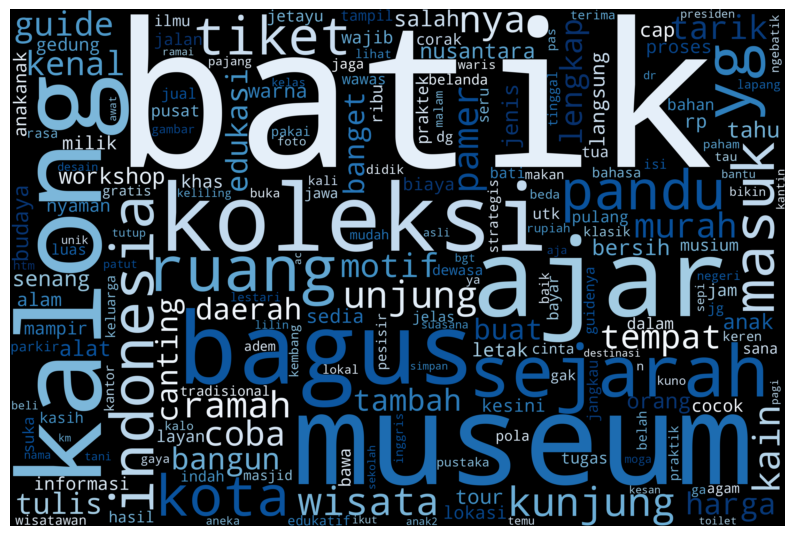

In [119]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# # Filter data untuk hanya menyertakan tweet positif
# netral_tweets = my_df[my_df['Label'] == 'None']

# # Gabungkan semua kata dalam kolom 'full_text' dari tweet positif menjadi satu string
# netral_words = ' '.join([tweets for tweets in netral_tweets['content']])

# Gabungkan semua kata dalam kolom 'full_text' menjadi satu string
all_words = ' '.join([tweets for tweets in df['text_tokens_stemmed'].fillna('')])

# Buat wordcloud untuk kata-kata positif
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(all_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Positif NB

### 1. Naive Bayes

#### Menghitung Jumlah Baris Positif

In [120]:
df[df['Label NB Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu.",letak lapang jetayu tempat bangun tua khas tinggal kolonial simpan jenis batik kalong koleksi batik daerah nyaman tempat ber ac yg dingin saji proses buat batik sedia layar lcd yg tampil informasi batik butuh tani pandu buka jam 8 pagi smpai jam 3 soredi coba batik alat yg sedia guide kantin bangku2 istirahat foto2 industri batik tempo pajang tembok musiumsaran koleksi batik mohon banyak daerah indonesia ciri khas batik masing2 yg gak kalah sejarah singkat modeltype zaman zaman now yg pasti alami ubah sesuai zaman masing2parkir motor langsung musium parkir mobil bis pariwisata lapang jetayu,positif,positif,positif,positif,positif
1,"Baru pertama kemuseum ini, dan dari beberapa museum batik yg pernah aku kunjungi, koleksi di museum ini nggak terlalu banyak. Tapi ternyata karna sistem di museum ini koleksinya dirolling, jadi kalau mau lihat koleksi yg berbeda tanya dulu ke pihak museum jadwal ganti koleksinya kapan ?? lokasinya gampang banget dicari, ada di titik 0 km Pekalongan. Gedungnya juga sangat standout, gedung kuno yang gede banget. Tour guide dan staff lain baik, ramah, murah senyum. Selain bisa lihat koleksi batik di museum ini juga ada perpustakaan yang koleksi buku tentang batiknya sangat lengkap, terus kita bisa langsung nyobain praktek bikin batik. Semua alat dan bahan sudah tersedia. Ada banyak pilihan cap batik yang bisa dipilih, kalau mau pakai canting juga boleh, pokoknya bebas mencoba. Overall kunjungan ke museum batik ini cukup berkesan ??????",museum museum batik yg kunjung koleksi museum nggak karna sistem museum koleksi dirolling lihat koleksi yg beda museum jadwal ganti koleksi lokasi gampang banget cari titik 0 km kalong gedung standout gedung kuno gede banget tour guide staff ramah murah senyum lihat koleksi batik museum pustaka koleksi buku batik lengkap langsung nyobain praktek bikin batik alat bahan sedia pilih cap batik pilih pakai canting pokok bebas coba overall kunjung museum batik kesan,positif,positif,positif,positif,positif
2,Koleksi batik lengkap dan bisa hands-on nyoba membatik juga! Mudah dipahami dan WAJIB NYOBA MEMBATIK SOALNYA SESERU ITU ???????,koleksi batik lengkap handson nyoba batik mudah paham wajib nyoba batik seru,positif,positif,positif,positif,positif
3,"Akhirnya kesampean buat mampir ke museum ini. HTM 7 ribu rupiah buat pengunjung dewasa.\nAda 3 ruang pamer, ruang audio visual (tadi belum bisa masuk ke ruang audio visual karena lagi ada problem), perpustakaan, musala, toilet, kantin, dan tempat untuk beli suvenir. Kalo mampir kesini bisa ikutan workshop batik.\nTempatnya bersih, info tentang koleksi museum sangat jelas, staff ramah, tempat parkir luas.\nBeberapa catatan buat museum:\n AC di Ruang Pamer 2 dan 3 tidak dingin.\n Sebaiknya penjelasan tentang koleksi di lengkapi dengan bahasa inggris, karena tidak semua koleksi ada bahasa tersebut.\n Ada beberapa i

In [121]:
len(df[df['Label NB Average'] == 'positif'])

548

#### Penerapan Wordcloud

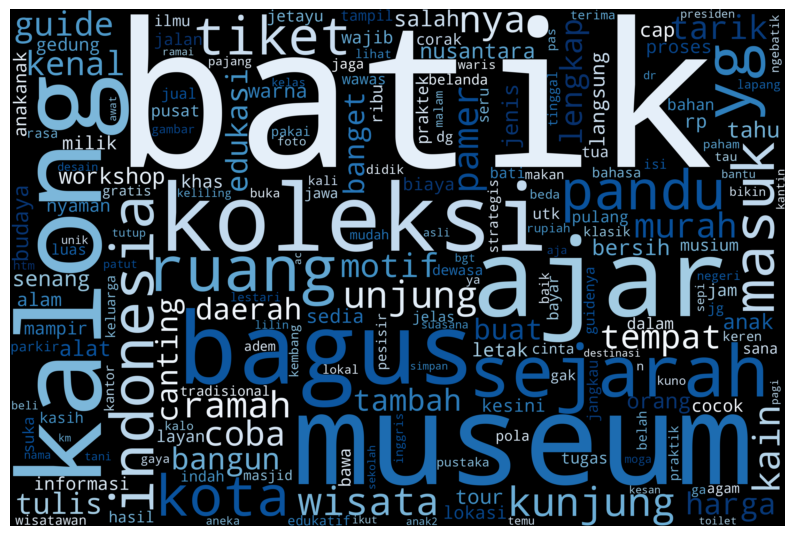

In [122]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')
    plt.show()

netral_tweets = df[df['Label NB Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])


wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

### 2. SVM

#### Menghitung Jumlah Baris Positif

In [123]:
df[df['Label SVM Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Terletak di depan Lapangan Jetayu, menempati bangunan tua khas peninggalan kolonial ini menyimpan berbagai jenis batik tidak hanya Pekalongan tapi juga koleksi batik beberapa daerah. Cukup nyaman tempatnya, ber AC yg cukup dingin, menyajikan proses pembuatan batik dari awal sampai akhir. Disediakan juga layar LCD yg menampilkan informasi tentang batik, kalau membutuhkan bisa ditemani oleh Pemandu. Buka setiap hari dari jam 8 pagi smpai jam 3 sore.\nDi bagian belakang kita bisa coba membatik dengan peralatan yg sudah disediakan oleh guide. Ada kantin di sini dan bangku2 panjang untuk istirahat. Beberapa foto2 industri batik tempo dulu dipajang di tembok musium.\nSaran saya, koleksi batik mohon bisa diperbanyak karena tiap daerah di Indonesia punya ciri khas batik masing2. Juga yg gak kalah penting dibuat sejarah singkat model/type zaman dulu sampai zaman now yg pastinya telah mengalami banyak perubahan sesuai zaman masing2.\nParkir motor langsung di depan musium. Parkir mobil atau bis pariwisata bisa di sekitar lapangan Jetayu.",letak lapang jetayu tempat bangun tua khas tinggal kolonial simpan jenis batik kalong koleksi batik daerah nyaman tempat ber ac yg dingin saji proses buat batik sedia layar lcd yg tampil informasi batik butuh tani pandu buka jam 8 pagi smpai jam 3 soredi coba batik alat yg sedia guide kantin bangku2 istirahat foto2 industri batik tempo pajang tembok musiumsaran koleksi batik mohon banyak daerah indonesia ciri khas batik masing2 yg gak kalah sejarah singkat modeltype zaman zaman now yg pasti alami ubah sesuai zaman masing2parkir motor langsung musium parkir mobil bis pariwisata lapang jetayu,positif,positif,positif,positif,positif
1,"Baru pertama kemuseum ini, dan dari beberapa museum batik yg pernah aku kunjungi, koleksi di museum ini nggak terlalu banyak. Tapi ternyata karna sistem di museum ini koleksinya dirolling, jadi kalau mau lihat koleksi yg berbeda tanya dulu ke pihak museum jadwal ganti koleksinya kapan ?? lokasinya gampang banget dicari, ada di titik 0 km Pekalongan. Gedungnya juga sangat standout, gedung kuno yang gede banget. Tour guide dan staff lain baik, ramah, murah senyum. Selain bisa lihat koleksi batik di museum ini juga ada perpustakaan yang koleksi buku tentang batiknya sangat lengkap, terus kita bisa langsung nyobain praktek bikin batik. Semua alat dan bahan sudah tersedia. Ada banyak pilihan cap batik yang bisa dipilih, kalau mau pakai canting juga boleh, pokoknya bebas mencoba. Overall kunjungan ke museum batik ini cukup berkesan ??????",museum museum batik yg kunjung koleksi museum nggak karna sistem museum koleksi dirolling lihat koleksi yg beda museum jadwal ganti koleksi lokasi gampang banget cari titik 0 km kalong gedung standout gedung kuno gede banget tour guide staff ramah murah senyum lihat koleksi batik museum pustaka koleksi buku batik lengkap langsung nyobain praktek bikin batik alat bahan sedia pilih cap batik pilih pakai canting pokok bebas coba overall kunjung museum batik kesan,positif,positif,positif,positif,positif
2,Koleksi batik lengkap dan bisa hands-on nyoba membatik juga! Mudah dipahami dan WAJIB NYOBA MEMBATIK SOALNYA SESERU ITU ???????,koleksi batik lengkap handson nyoba batik mudah paham wajib nyoba batik seru,positif,positif,positif,positif,positif
3,"Akhirnya kesampean buat mampir ke museum ini. HTM 7 ribu rupiah buat pengunjung dewasa.\nAda 3 ruang pamer, ruang audio visual (tadi belum bisa masuk ke ruang audio visual karena lagi ada problem), perpustakaan, musala, toilet, kantin, dan tempat untuk beli suvenir. Kalo mampir kesini bisa ikutan workshop batik.\nTempatnya bersih, info tentang koleksi museum sangat jelas, staff ramah, tempat parkir luas.\nBeberapa catatan buat museum:\n AC di Ruang Pamer 2 dan 3 tidak dingin.\n Sebaiknya penjelasan tentang koleksi di lengkapi dengan bahasa inggris, karena tidak semua koleksi ada bahasa tersebut.\n Ada beberapa i

In [124]:
len(df[df['Label SVM Average'] == 'positif'])

548

#### Penerapan Wordcloud

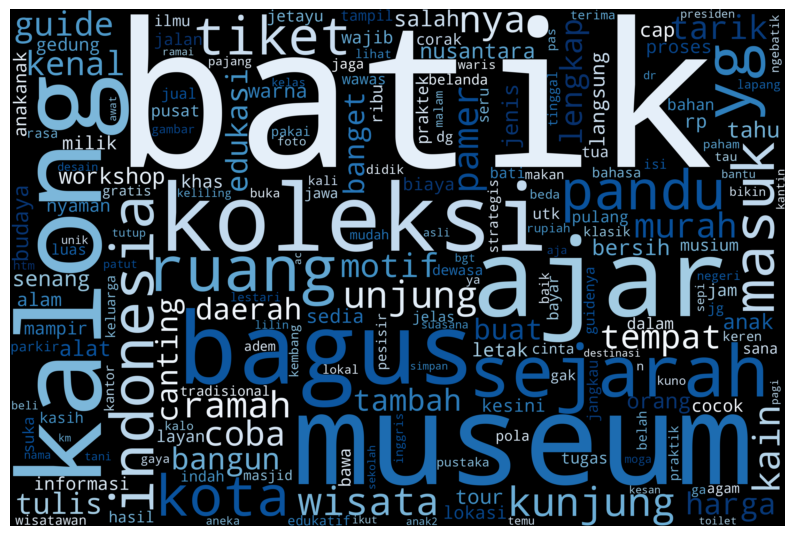

In [125]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')


    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Negatif

### 1. Naive Bayes

#### Menghitung Jumlah Baris Negatif

In [126]:
df[df['Label NB Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average


In [127]:
len(df[df['Label NB Average'] == 'negatif'])

0

In [128]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label NB Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

ValueError: We need at least 1 word to plot a word cloud, got 0.

### 2. SVM

#### Menghitung Jumlah Baris Negatif

In [134]:
df[df['Label SVM Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average


In [132]:
len(df[df['Label SVM Average'] == 'negatif'])

0

In [133]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

ValueError: We need at least 1 word to plot a word cloud, got 0.